In [2]:
import os
import os.path
import sys
import random

import tensorflow as tf
import numpy as np

%matplotlib inline
import matplotlib.pylab as plt
from tqdm import tqdm_notebook
from urllib.request import urlretrieve

from keras.applications.xception import Xception, preprocess_input, decode_predictions
from keras.preprocessing.image import img_to_array, load_img

Using TensorFlow backend.


In [3]:
IMAGE_SIZE = (224, 224)

def open_image(data_path, **kwargs):
    if not os.path.isfile(data_path):
        temp_file = '/tmp/{0}'.format(os.path.split(data_path)[-1])
        urlretrieve(data_path, temp_file)
        data_path = temp_file
    return load_img(data_path, **kwargs)

def preprocess_image(image_path):
    image_original = open_image(image_path, target_size=IMAGE_SIZE)
    image = img_to_array(image_original)
    image = np.expand_dims(image, 0)
    image = preprocess_input(image)
    return image, image_original

### Pretrained Xception

In [4]:
model = Xception()
print(model.summary())

try:
    from utils import show_current_graph
    show_current_graph()
except:
    pass

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, None, None, 3 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, None, None, 3 0           block1_conv1_bn[0][0]            
__________________________________________________________________________________________________
block1_con

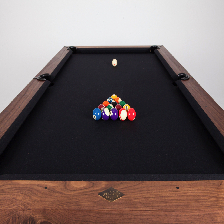

In [5]:
IMG_URL = 'https://static1.squarespace.com/static/528b07c0e4b030a48afcada4/57a1617a29687f4a21ad6094/5a9dee109140b7a2b4ea48f5/1520299544590/POOLTABLE-WEB+-+10.jpg?format=1500w'

image_normalized, original_image = preprocess_image(IMG_URL)
prediction = model.predict(image_normalized)

original_image

In [6]:
decode_predictions(prediction)

[[('n03982430', 'pool_table', 0.9999919),
  ('n03134739', 'croquet_ball', 2.522371e-07),
  ('n03814639', 'neck_brace', 2.2164437e-07),
  ('n03942813', 'ping-pong_ball', 1.5300908e-07),
  ('n04409515', 'tennis_ball', 1.503077e-07)]]

# Semantic similarity of images

In [7]:
model = Xception(include_top=False, pooling='avg')

In [19]:
NB_ITERATIONS = 100

RND_IMG_URL = 'https://picsum.photos/224/224/?random'
#RND_IMG_URL = 'https://source.unsplash.com/random/224x224'
#RND_IMG_URL = 'https://placeimg.com/224/224/any'

features_list = list()
images_list = list()

for iteration in tqdm_notebook(range(NB_ITERATIONS)):
    image_normalized, original_image = preprocess_image(RND_IMG_URL)
    features = model.predict_on_batch(image_normalized)
    
    images_list.append(original_image)
    features_list.append(features[0])
    
features_list = np.array(features_list)

In [20]:
from sklearn.metrics.pairwise import cosine_similarity

images_similarity = np.tril(cosine_similarity(features_list) * (~np.eye(len(features_list)).astype('bool')))

Similarity: 0.919


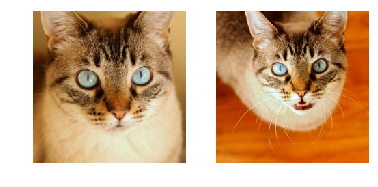

Similarity: 0.763


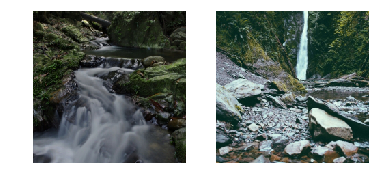

In [21]:
min_similarity_threshold = 0.7

for a_idx, row in enumerate(images_similarity):
    max_similarity = row.max()
    if max_similarity > min_similarity_threshold and max_similarity<0.99:
        print('Similarity:', round(max_similarity, 3))
        b_idx = row.argmax()
        plt.subplot(121)
        plt.axis('off')
        plt.imshow(images_list[a_idx])

        plt.subplot(122)
        plt.imshow(images_list[b_idx])
        plt.axis('off')
        plt.show()